In [13]:
# Step 0: Install and Import Libraries
!pip install nltk spacy --quiet
!python -m spacy download en_core_web_sm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # Add this line to download the missing resource

import re
import string
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from spacy import displacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /content/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [2]:
#sample paragraph
text = """
Elon Musk, the CEO of Tesla and SpaceX, visited India in March 2025 to explore investment opportunities.
During his trip, he met with Prime Minister Narendra Modi to discuss potential collaborations in clean energy and satellite technology.
"""


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_text = clean_text(text)
print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
 elon musk the ceo of tesla and spacex visited india in march to explore investment opportunities during his trip he met with prime minister narendra modi to discuss potential collaborations in clean energy and satellite technology


In [7]:
sentences = sent_tokenize(cleaned_text)
words = word_tokenize(cleaned_text)

print("\nTokenized Sentences:\n", sentences)
print("\nTokenized Words:\n", words)



Tokenized Sentences:
 ['elon musk the ceo of tesla and spacex visited india in march to explore investment opportunities during his trip he met with prime minister narendra modi to discuss potential collaborations in clean energy and satellite technology']

Tokenized Words:
 ['elon', 'musk', 'the', 'ceo', 'of', 'tesla', 'and', 'spacex', 'visited', 'india', 'in', 'march', 'to', 'explore', 'investment', 'opportunities', 'during', 'his', 'trip', 'he', 'met', 'with', 'prime', 'minister', 'narendra', 'modi', 'to', 'discuss', 'potential', 'collaborations', 'in', 'clean', 'energy', 'and', 'satellite', 'technology']


In [8]:
stop_words = set(stopwords.words('english'))

words_filtered = [w for w in words if w not in stop_words]

print("\nAfter Stopword Removal:\n", words_filtered)
print(f"\nWord count before: {len(words)} | After: {len(words_filtered)}")
print(f"Unique words before: {len(set(words))} | After: {len(set(words_filtered))}")



After Stopword Removal:
 ['elon', 'musk', 'ceo', 'tesla', 'spacex', 'visited', 'india', 'march', 'explore', 'investment', 'opportunities', 'trip', 'met', 'prime', 'minister', 'narendra', 'modi', 'discuss', 'potential', 'collaborations', 'clean', 'energy', 'satellite', 'technology']

Word count before: 36 | After: 24
Unique words before: 33 | After: 24


In [9]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sample_words = words_filtered[:10]

print("\nOriginal | Stemmed | Lemmatized")
print("----------------------------------")
for word in sample_words:
    print(f"{word:<10} | {stemmer.stem(word):<10} | {lemmatizer.lemmatize(word)}")



Original | Stemmed | Lemmatized
----------------------------------
elon       | elon       | elon
musk       | musk       | musk
ceo        | ceo        | ceo
tesla      | tesla      | tesla
spacex     | spacex     | spacex
visited    | visit      | visited
india      | india      | india
march      | march      | march
explore    | explor     | explore
investment | invest     | investment



POS Tag Counts:
 Counter({'NN': 15, 'JJ': 3, 'VBD': 2, 'NNS': 2, 'VBZ': 1, 'VBP': 1})


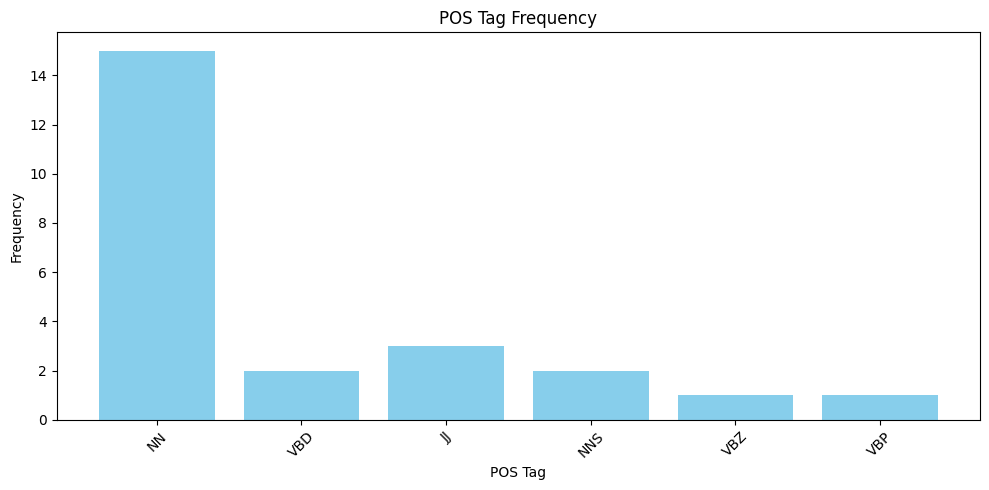

In [14]:
# Add the download directory to NLTK's data path
nltk.data.path.append('/content/nltk_data')

pos_tags = nltk.pos_tag(words_filtered)

# Count POS Tags
tag_counts = Counter(tag for word, tag in pos_tags)

# Display counts
print("\nPOS Tag Counts:\n", tag_counts)

# Bar Plot
plt.figure(figsize=(10, 5))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.title("POS Tag Frequency")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

print("\nNamed Entities and Labels:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")

# Visual NER
displacy.render(doc, style="ent", jupyter=True)



Named Entities and Labels:
Elon Musk → PERSON
Tesla → ORG
SpaceX → PERSON
India → GPE
March 2025 → DATE
Narendra Modi → PERSON
